1. Intal library pydrive2

In [ ]:
!pip install pydrive2

2. Akses Dataset

In [ ]:
from pydrive2.auth import GoogleAuth


from pydrive2.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

3. Download dataset

In [ ]:
folder_id = '1P3MClXDlUByWEv822qYT9qk75rCzx1jv'
target_filename = 'Dataset NBA.csv'
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

found = False

for file in file_list:
  if file['title'] == target_filename:
    print(f" Download File : {file ['title']} ....")
    file.GetContentFile(file['title'])
    print(f" Download Selesai")
    found = True
    break

if not found:
  print(f"File '{target_filename}' tidak ditemukan.")


File 'Dataset NBA.csv' tidak ditemukan.


4.Import Library

*   NumPy untuk membantu perhitungan angka-angka dan memproses data dalam bentuk array.

*   Pandas membantu membaca dataset dan mengelola data dalam bentuk tabel, supaya mudah dianalisis.

*   Matplotlib dan Seaborn membuat grafik, agar hasil data dan model lebih mudah dipahami secara visual.

*   Library scikit-learn untuk membangun linear regresi untuk memeriksa hubungan variabel, melakukan pembagian data, dan mengevaluasi hasil model dengan metrik seperti mae, mse, rmse, dan r2 score.

*   Warning agar output terlihat lebih rapi.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

5. Load Dataset

In [ ]:
df = pd.read_csv('Dataset NBA.csv')
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,Player-additional,Season Type,PER,Adjusted Salary
0,1,Joel Embiid,28,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.0,1.7,3.4,3.1,33.1,MVP-1DPOY-9CPOY-5ASNBA1,embiijo01,Regular,31.4,35605377.25
1,2,Luka Dončić,23,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1,doncilu01,Regular,28.7,39290951.43
2,3,Damian Lillard,32,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.9,0.3,3.3,1.9,32.2,CPOY-10ASNBA3,lillada01,Regular,26.7,45006144.50
3,4,Shai Gilgeous-Alexander,24,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,1.6,1.0,2.8,2.8,31.4,MVP-5CPOY-7ASNBA1,gilgesh01,Regular,27.2,32742459.52
4,5,Giannis Antetokounmpo,28,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,0.8,0.8,3.9,3.1,31.1,MVP-3DPOY-6ASNBA1,antetgi01,Regular,29.0,45006144.50


*  G (Games Played): Berapa kali pemain bertanding dalam satu musim.

*  GS (Games Started): Berapa kali pemain jadi starter dalam pertandingan.

*  MP (Minutes Played per Game): Rata-rata menit bermain tiap pertandingan.

*  FG (Field Goals Made): Berapa kali tembakan masuk.

*  FGA (Field Goals Attempted): Berapa kali pemain mencoba melakukan tembakan.

*  FG% (Field Goal Percentage): Persentase tembakan yang berhasil masuk.

*  3P (Three-Point Made): Berapa kali tembakan tiga poin masuk.

*  3PA (Three-Point Attempted): Berapa kali pemain mencoba tembakan tiga poin.

*  3P% (Three-Point Percentage): Persentase keberhasilan tembakan tiga poin.

*  2P (Two-Point Made): Berapa kali tembakan dua poin masuk.

*  2PA (Two-Point Attempted): Berapa kali pemain mencoba tembakan dua poin.

*  2P% (Two-Point Percentage): Persentase keberhasilan tembakan dua poin.

*  FT (Free Throws Made): Berapa kali lemparan bebas masuk.

*  FTA (Free Throws Attempted): Berapa kali pemain mencoba lemparan bebas.

*  FT% (Free Throw Percentage): Persentase keberhasilan lemparan bebas.

*  ORB (Offensive Rebounds): Rebound yang dilakukan di area lawan (merebut bola setelah tembakan gagal tim sendiri).

*  DRB (Defensive Rebounds): Rebound yang dilakukan di area sendiri (mengamankan bola setelah tembakan gagal tim lawan).

*  TRB (Total Rebounds): Total rebound gabungan dari ORB dan DRB.

*  AST (Assists): Operan yang langsung berujung pada poin.

*  STL (Steals): Merebut atau mencuri bola dari lawan.

*  BLK (Blocks): Memblok tembakan lawan.

*  TOV (Turnovers): Kesalahan pemain yang menyebabkan bola direbut oleh tim lawan.

*  PF (Personal Fouls): Jumlah pelanggaran pribadi yang dilakukan pemain.

*  PER (Player Efficiency Rating): Sebuah metrik yang mengukur performa pemain per menit bermain, dengan menyesuaikan kecepatan permainan (pace).

*  PTS (Points Scored): Jumlah total poin yang dicetak oleh pemain selama pertandingan, dihitung dari hasil tembakan dua angka, tiga angka, dan lemparan bebas


6. Jumlah kolom dan baris pada dataset

In [ ]:
df.shape

(896, 35)

7. Ringkasan statistik kolom numerik

In [ ]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Adjusted Salary
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02
mean,284.054688,26.273438,34.770089,16.146205,19.498884,3.235826,6.957924,0.453565,0.989397,2.790848,...,2.616741,3.455692,1.979687,0.589509,0.372656,1.058594,1.652455,8.820312,12.515402,9.545675e+06
std,199.758665,4.364152,26.484540,23.653831,10.455678,2.542242,5.220315,0.132219,0.894995,2.309452,...,1.882299,2.496516,1.962165,0.430151,0.400837,0.870108,0.865086,7.088298,7.877857,1.133050e+07
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.500000,6.195000e+03
25%,112.750000,23.000000,8.000000,0.000000,11.500000,1.400000,3.100000,0.406000,0.200000,0.900000,...,1.300000,1.600000,0.700000,0.300000,0.100000,0.500000,1.000000,3.700000,9.575000,2.214894e+06
50%,231.500000,25.000000,30.000000,4.000000,18.800000,2.500000,5.600000,0.453000,0.800000,2.400000,...,2.200000,3.000000,1.300000,0.500000,0.300000,0.800000,1.600000,6.900000,12.900000,4.699472e+06
75%,455.250000,29.000000,60.000000,22.000000,28.325000,4.400000,9.400000,0.504000,1.500000,4.300000,...,3.525000,4.600000,2.700000,0.800000,0.500000,1.400000,2.200000,12.000000,16.100000,1.213497e+07
max,679.000000,42.000000,83.000000,83.000000,42.400000,12.800000,24.800000,1.000000,4.900000,12.100000,...,11.700000,14.100000,10.700000,3.000000,3.100000,4.700000,5.000000,34.500000,65.600000,5.091361e+07


8. Memeriksa kolom null

In [ ]:
df.isnull().sum()

,0
Rk,0
Player,0
Age,0
Team,0
Pos,0
G,0
GS,0
MP,0
FG,0
FGA,0


9. Memunculkkan data dengan tipe numerical

In [ ]:
data_numerik = df.select_dtypes(include = ['number']).columns
df_num = df.select_dtypes(include = 'number')
print(data_numerik)
print(df_num)

Index(['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Adjusted Salary'],
      dtype='object')
      Rk  Age     G    GS    MP    FG   FGA    FG%   3P   3PA  ...  DRB   TRB  \
0      1   28  66.0  66.0  34.6  11.0  20.1  0.548  1.0   3.0  ...  8.4  10.2   
1      2   23  66.0  66.0  36.2  10.9  22.0  0.496  2.8   8.2  ...  7.8   8.6   
2      3   32  58.0  58.0  36.3   9.6  20.7  0.463  4.2  11.3  ...  4.0   4.8   
3      4   24  68.0  68.0  35.5  10.4  20.3  0.510  0.9   2.5  ...  4.0   4.8   
4      5   28  63.0  63.0  32.1  11.2  20.3  0.553  0.7   2.7  ...  9.6  11.8   
..   ...  ...   ...   ...   ...   ...   ...    ...  ...   ...  ...  ...   ...   
891  213   21   1.0   0.0   2.0   0.0   0.0  0.453  0.0   0.0  ...  0.0   0.0   
892  214   23   1.0   0.0   1.0   0.0   0.0  0.453  0.0   0.0  ...  0.0   0.0   
893  215   34   1.0  

10. Pada tahap ini, dilakukan analisis korelasi untuk melihat hubungan antara fitur-fitur numerik dengan kolom GS (Games Started).
Analisis ini bertujuan untuk mengetahui variabel-variabel mana saja yang memiliki pengaruh besar terhadap kemungkinan seorang pemain menjadi starter (pemain inti).
Korelasi matrix akan membantu mengidentifikasi fitur yang paling relevan dan dapat digunakan sebagai prediktor dalam model prediksi pemain starter.

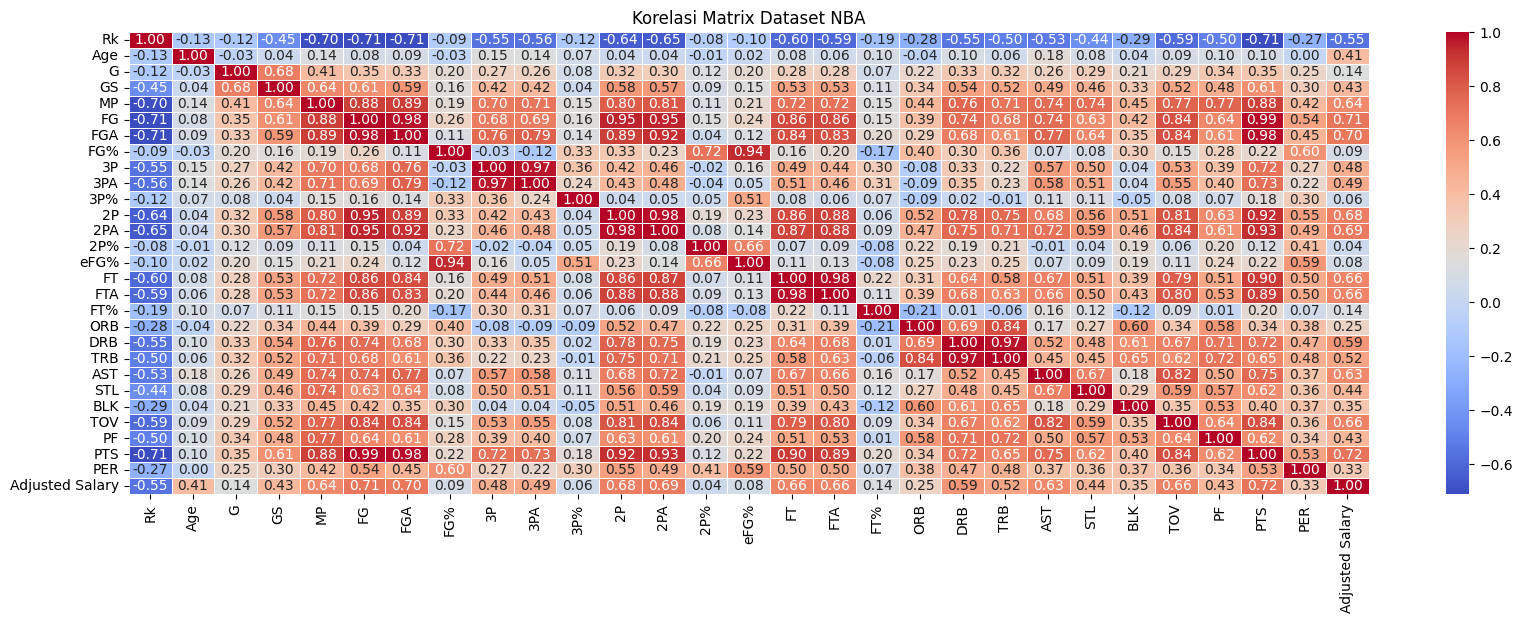

In [ ]:
corr_matrix = df_num.corr()
plt.figure(figsize = (20,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth =  0.5)
plt.title('Korelasi Matrix Dataset NBA')
plt.show()

11. Hasil kolerasi antara seluruh fitur numerik dengan GS

In [ ]:
korelasi_GS = (corr_matrix[['GS']].round(2))

print(korelasi_GS)


                   GS
Rk              -0.45
Age              0.04
G                0.68
GS               1.00
MP               0.64
FG               0.61
FGA              0.59
FG%              0.16
3P               0.42
3PA              0.42
3P%              0.04
2P               0.58
2PA              0.57
2P%              0.09
eFG%             0.15
FT               0.53
FTA              0.53
FT%              0.11
ORB              0.34
DRB              0.54
TRB              0.52
AST              0.49
STL              0.46
BLK              0.33
TOV              0.52
PF               0.48
PTS              0.61
PER              0.30
Adjusted Salary  0.43


12.Semakin nilai korelasi sebuah fitur mendekati 1, maka semakin kuat hubungan antara fitur tersebut dengan GS (Games Started).
Berdasarkan hasil perhitungan korelasi, saya menemukan bahwa fitur-fitur yang memiliki nilai korelasi paling mendekati 1 berada pada rentang 0,61 hingga 0,68.
Nilai ini menunjukkan adanya hubungan yang cukup kuat antara fitur-fitur tersebut dengan jumlah pertandingan yang dimulai oleh pemain sebagai starter.
Pada bagian berikut akan ditampilkan fitur-fitur yang memiliki korelasi tertinggi dengan GS, yang nantinya akan dipertimbangkan sebagai variabel penting dalam pembuatan model prediksi pemain starter.

In [ ]:
Fitur_yg_berkolerasi = korelasi_GS[korelasi_GS > 0.6].dropna()
print(Fitur_yg_berkolerasi)


       GS
G    0.68
GS   1.00
MP   0.64
FG   0.61
PTS  0.61


G (Games Played): Berapa kali pemain bertanding dalam satu musim.

GS (Games Started): Berapa kali pemain jadi starter dalam pertandingan.

MP (Minutes Played per Game): Rata-rata menit bermain tiap pertandingan.

FG (Field Goals Made): Berapa kali tembakan masuk.

PTS (Points Scored): Jumlah total poin yang dicetak oleh pemain selama pertandingan, dihitung dari hasil tembakan dua angka, tiga angka, dan lemparan bebas

Setelah menemukan fitur fitur yang berkolerasi saya melakukan simple linear regresi bagaimana model bekerja seberapa baik hubungan fitur

13. Membuat x dan y

In [ ]:
x = df_num[['G','MP','FG','PTS']]
y = df_num['GS']

14. Split data test dan train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

15. Membuat Model Linear Regresi Masing-Masing Fitur

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_G = LinearRegression().fit(x_train[['G']], y_train)
lr_MP = LinearRegression().fit(x_train[['MP']], y_train)
lr_FG = LinearRegression().fit(x_train[['FG']], y_train)
lr_PTS = LinearRegression().fit(x_train[['PTS']], y_train)

16. Membuat model prediksi masing-masing fitur

In [ ]:
y_pred_G = lr_G.predict(x_test[['G']])
y_pred_MP = lr_MP.predict(x_test[['MP']])
y_pred_FG = lr_FG.predict(x_test[['FG']])
y_pred_PTS = lr_PTS.predict(x_test[['PTS']])

print(y_pred_G)
print(y_pred_MP)
print(y_pred_FG)
print(y_pred_PTS)


[ 2.85338942 18.41814214 12.19224105  1.60820921 37.71843551 40.83138605
 43.32174649  9.07929051 40.20879595 34.60548497 37.0958454  -2.12733145
 22.7762729  37.0958454  18.41814214 -2.74992155  4.09856964 -0.25956112
 -4.61769188 36.47325529 43.9443366  27.75699377 30.24735421  5.96633997
 37.71843551  8.4567004  37.0958454  -3.99510177 35.22807508  9.07929051
 17.79555203 29.00217399  2.23079931 40.20879595 35.22807508  5.34374986
 40.20879595 37.0958454  -1.50474134 -3.99510177 38.34102562 11.56965095
 17.79555203 -2.12733145 38.34102562 36.47325529 37.71843551 29.6247641
  7.83411029 -4.61769188 15.3051916  -3.99510177 22.15368279 -1.50474134
 35.85066518 -2.74992155 33.98289486 -3.37251166  9.70188062 33.98289486
 11.56965095 14.68260149 44.56692671 44.56692671 33.36030475  1.60820921
 18.41814214 15.92778171  0.9856191  41.45397616 10.94706084 20.90850258
 -0.25956112 -3.99510177 -0.25956112 -2.12733145 -2.12733145  2.23079931
 34.60548497 38.34102562 -2.12733145 36.47325529 36.

17. Evaluasi matrix

In [ ]:
mae_G = mean_absolute_error(y_test, y_pred_G)
mse_G = mean_squared_error(y_test, y_pred_G)
rmse_G = np.sqrt(mse_G)
r2_G = r2_score(y_test, y_pred_G)

mae_Mp = mean_absolute_error(y_test, y_pred_MP)
mse_MP = mean_squared_error(y_test, y_pred_MP)
rmse_MP = np.sqrt(mse_MP)
r2_MP = r2_score(y_test, y_pred_MP)

mae_FG = mean_absolute_error(y_test, y_pred_FG)
mse_FG = mean_squared_error(y_test, y_pred_FG)
rmse_FG = np.sqrt(mse_FG)
r2_FG = r2_score(y_test, y_pred_FG)

mae_PTS = mean_absolute_error(y_test, y_pred_PTS)
mse_PTS = mean_squared_error(y_test, y_pred_PTS)
rmse_PTS = np.sqrt(mse_PTS)
r2_PTS = r2_score(y_test, y_pred_PTS)




In [ ]:
metrics_data = {
    'MAE': [mae_G, mae_Mp, mae_FG, mae_PTS],
    'MSE': [mse_G, mse_MP, mse_FG, mse_PTS],
    'RMSE': [rmse_G, rmse_MP, rmse_FG, rmse_PTS],
    'R²': [r2_G, r2_MP, r2_FG, r2_PTS],

}
metrics_table = pd.DataFrame(metrics_data, index=['G', 'MP', 'FG', 'PTS']).T

# Tampilkan tabel
rata_test=  y_test.mean()
print(rata_test)
print(metrics_table)

15.161111111111111
               G          MP          FG         PTS
MAE    13.300187   11.766888   11.265264   11.203931
MSE   299.483532  257.231471  262.977577  260.453095
RMSE   17.305593   16.038437   16.216583   16.138559
R²      0.409279    0.492620    0.481286    0.486265


MAE

    PTS < FG < MP < G

MSE

    MP < PTS < FG < G

RMSE

    MP < PTS < FG < G

R2  

    MP > PTS > FG > G



Urutan dari yang paling bagus dan paling meleset adalah

     MP - PTS - FG - G

*  MAE (Mean Absolute Error)
Mengukur rata-rata seberapa jauh kesalahan prediksi dari nilai sebenarnya. Semakin kecil MAE, semakin baik model.

*  MSE (Mean Squared Error)
Mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. MSE lebih sensitif terhadap error besar. Semakin kecil MSE, semakin baik.

*  RMSE (Root Mean Squared Error)
Merupakan akar dari MSE. Nilai RMSE memudahkan interpretasi karena satuannya sama dengan data asli. Semakin kecil RMSE, semakin baik prediksi model.

*  R² (R-squared)
Mengukur seberapa baik model menjelaskan variasi data. Nilainya berkisar antara 0 hingga 1.

*  Semakin mendekati 1, semakin baik model.

*  Jika R² rendah, artinya model kurang mampu menjelaskan variasi data.

18. Visualisasi hasi linear regresi

1. Scater Plot G - GS

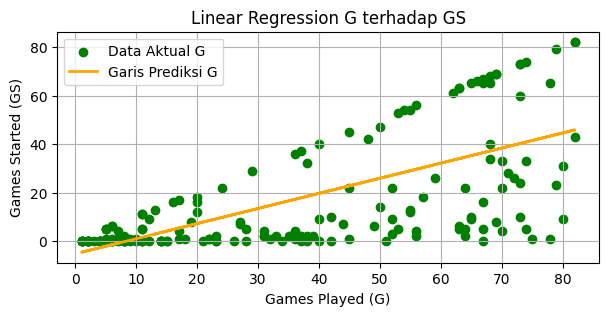

In [ ]:
plt.figure(figsize=(7, 3))
plt.scatter(x_test['G'], y_test, color='green', label='Data Aktual G')
plt.plot(x_test['G'], y_pred_G, color='orange', linewidth=2, label='Garis Prediksi G')
plt.xlabel('Games Played (G)')
plt.ylabel('Games Started (GS)')
plt.title('Linear Regression G terhadap GS')
plt.legend()
plt.grid(True)
plt.show()


2. Scater Plot FG - GS

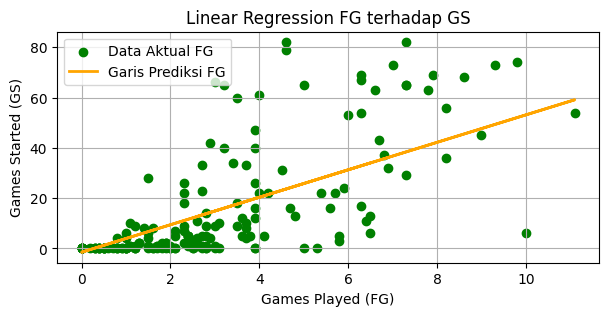

In [ ]:
plt.figure(figsize=(7, 3))
plt.scatter(x_test['FG'], y_test, color='green', label='Data Aktual FG')
plt.plot(x_test['FG'], y_pred_FG, color='orange', linewidth=2, label='Garis Prediksi FG')
plt.xlabel('Games Played (FG)')
plt.ylabel('Games Started (GS)')
plt.title('Linear Regression FG terhadap GS')
plt.legend()
plt.grid(True)
plt.show()


3. Scater Plot PTS - GS

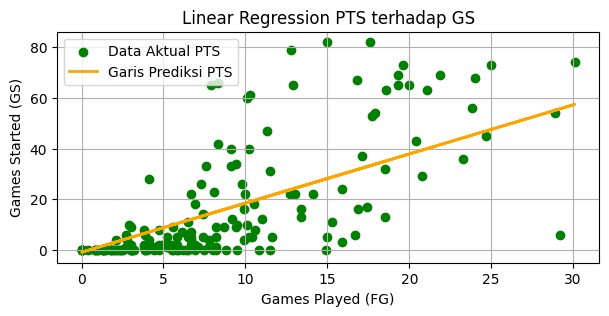

In [ ]:
plt.figure(figsize=(7, 3))
plt.scatter(x_test['PTS'], y_test, color='green', label='Data Aktual PTS')
plt.plot(x_test['PTS'], y_pred_PTS, color='orange', linewidth=2, label='Garis Prediksi PTS')
plt.xlabel('Games Played (FG)')
plt.ylabel('Games Started (GS)')
plt.title('Linear Regression PTS terhadap GS')
plt.legend()
plt.grid(True)
plt.show()


4. Scater Plot MP-GS

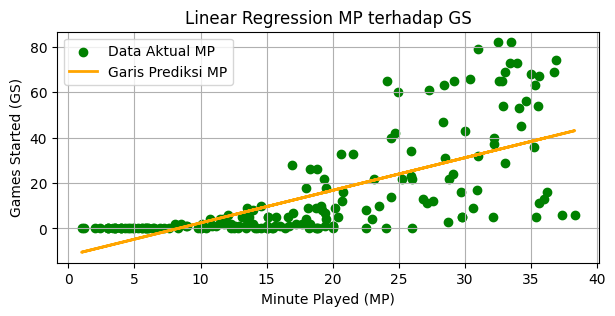

In [ ]:
plt.figure(figsize=(7, 3))
plt.scatter(x_test['MP'], y_test, color='green', label='Data Aktual MP')
plt.plot(x_test['MP'], y_pred_MP, color='orange', linewidth=2, label='Garis Prediksi MP')
plt.xlabel('Minute Played (MP)')
plt.ylabel('Games Started (GS)')
plt.title('Linear Regression MP terhadap GS')
plt.legend()
plt.grid(True)
plt.show()


19. Kesimpulan

Dari hasil perhitungan metrik dapat disimpulkan bahwa variabel-variabel tersebut sudah diurutkan berdasarkan performa modelnya.

Berdasarkan nilai MAE, MSE, dan RMSE yang lebih kecil serta nilai R² yang lebih besar, dapat disimpulkan bahwa variabel MP memiliki hubungan paling kuat dan paling baik dalam memprediksi target, diikuti oleh PTS, lalu FG, dan yang paling rendah adalah G.

Lalu hasil dari  scatter plot membantu memperkuat insight bahwa variabel MP adalah prediktor terbaik untuk mempengaruhi GS, diikuti oleh PTS dan FG, sedangkan G memiliki kontribusi paling kecil.